# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

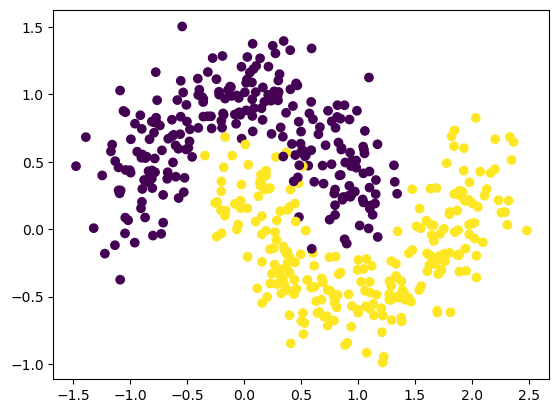

In [3]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

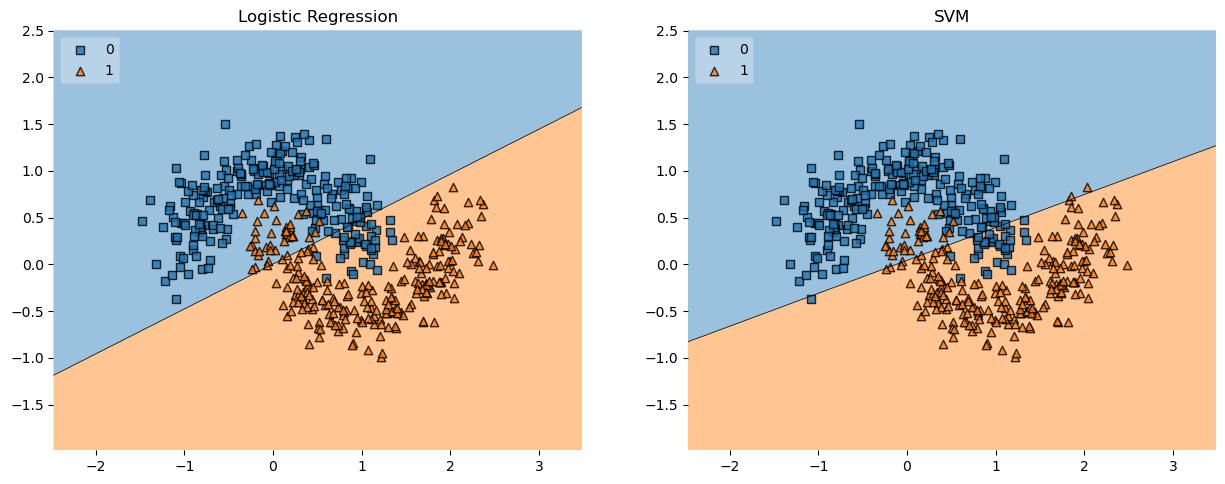

Logistic Regression Accuracy: 0.844
SVM Accuracy: 0.854


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import itertools

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

from sklearn.metrics import accuracy_score

lr = LogisticRegression(C=0.1) # add some params
svm = SVC(kernel='linear', degree=2, coef0=1, C=0.5, gamma='scale') # here too
X = moons_points
y = moons_labels
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(15, 12))

for clf, lab, grd in zip([lr, svm],
                         ['Logistic Regression', 'SVM'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

lr_acc = accuracy_score(y, lr.predict(X))
svm_acc = accuracy_score(y, svm.predict(X))

print(f"Logistic Regression Accuracy: {lr_acc}")
print(f"SVM Accuracy: {svm_acc}")
### YOUR CODE HERE

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

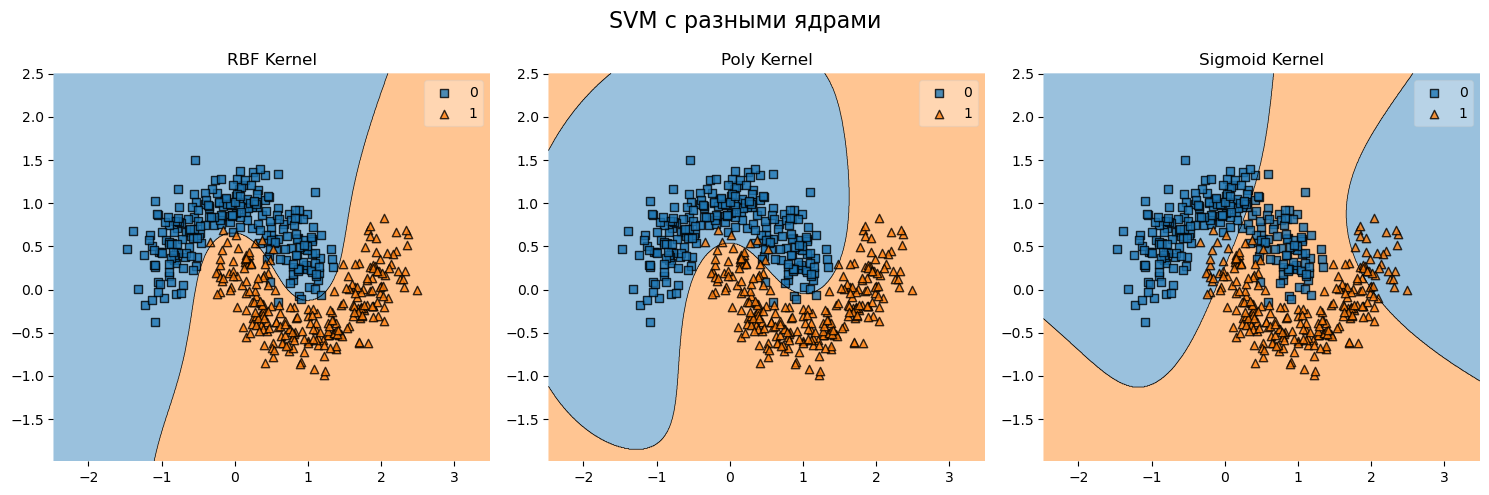

SVM with poly kernel accuracy: 0.982
SVM with rbf kernel accuracy: 0.972
SVM with sigmoid kernel accuracy: 0.706


In [97]:
### YOUR CODE HERE
gs = gridspec.GridSpec(2, 2)
svm1 = SVC(kernel='poly', degree=5, coef0=1, C=0.5, gamma='scale') # here too
svm2= SVC(kernel='rbf', coef0=1, C=0.5, gamma='scale') # here too
svm3= SVC(kernel='sigmoid', coef0=1, C=0.2, gamma='scale') # here too
X = moons_points
y = moons_labels
# fig = plt.figure(figsize=(15, 12))

svm1.fit(X, y)
svm2.fit(X, y)
svm3.fit(X, y)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 строка, 3 столбца

fig.suptitle("SVM с разными ядрами", fontsize=16)
# Рисуем первый график
plot_decision_regions(X, y, clf=svm1, ax=axes[0])  # Указываем ось axes[0]
axes[0].set_title('RBF Kernel')

# Рисуем второй график
plot_decision_regions(X, y, clf=svm2, ax=axes[1])  # Указываем ось axes[1]
axes[1].set_title('Poly Kernel')

# Рисуем третий график
plot_decision_regions(X, y, clf=svm3, ax=axes[2])  # Указываем ось axes[2]
axes[2].set_title('Sigmoid Kernel')

# Показать все графики
plt.tight_layout()  # Удобная компоновка
plt.show()


svm1_acc = accuracy_score(y, svm1.predict(X))
svm2_acc = accuracy_score(y, svm2.predict(X))
svm3_acc = accuracy_score(y, svm3.predict(X))

print(f"SVM with poly kernel accuracy: {svm1_acc}")
print(f"SVM with rbf kernel accuracy: {svm2_acc}")
print(f"SVM with sigmoid kernel accuracy: {svm3_acc}")

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

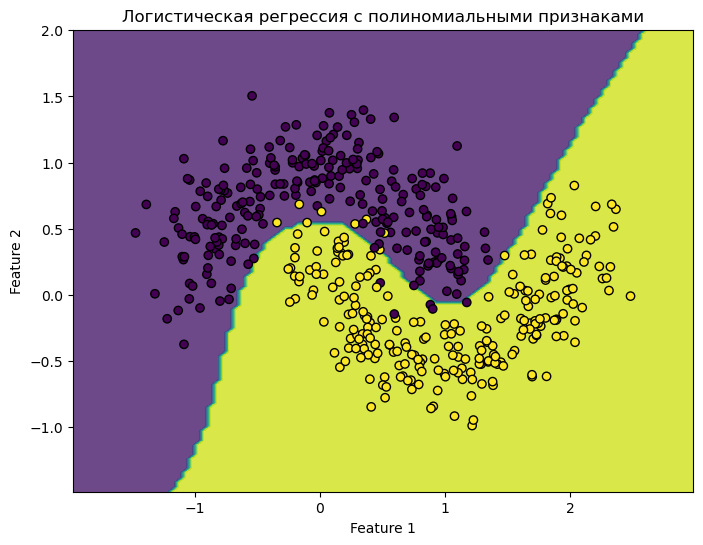

Logistic Regression Accuracy: 0.972


In [99]:
# Пример отрисовки графика нашел на https://www.geeksforgeeks.org/logistic-regression-with-polynomial-features/

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
X_curve = poly.fit_transform(X)

lr_curve = LogisticRegression(C=1.0, solver='liblinear')
lr_curve.fit(X_curve, y)

def plot_decisions_poly(X, y, model, poly_features, title):
    plt.figure(figsize=(8, 6))
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(poly_features.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


plot_decisions_poly(X, y, lr_curve, poly, "Логистическая регрессия с полиномиальными признаками")
lr_curve_acc = accuracy_score(y, lr_curve.predict(X_curve))
print(f"Logistic Regression Accuracy: {lr_curve_acc}")

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

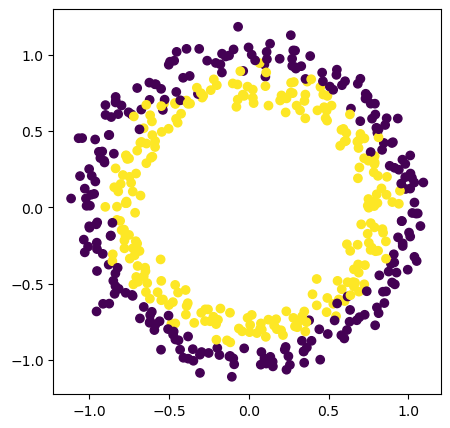

In [77]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

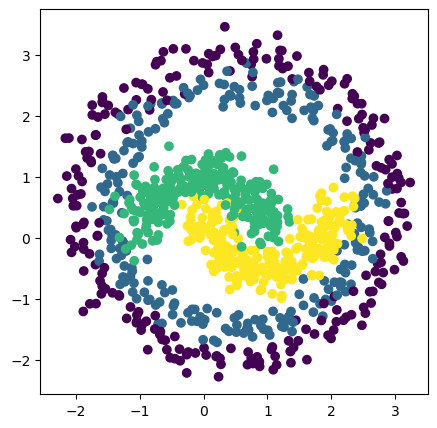

In [78]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

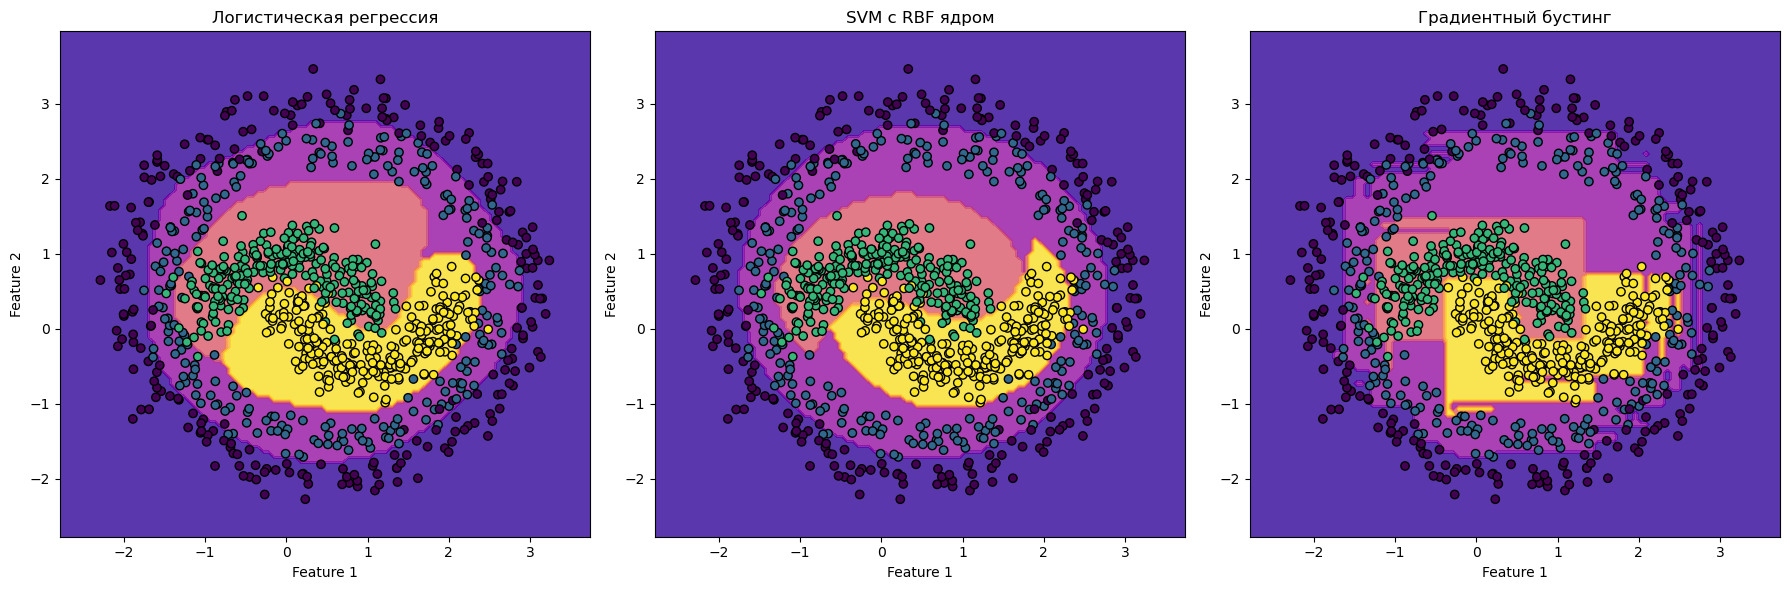

Логистическая регрессия с полиномиальными признаками, accuracy: 0.94
SVM c RBF ядром, accuracy: 0.92
Градиентный бустинг, accuracy: 1.00


In [105]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(points)

# 2. Обучение логистической регрессии на новых признаках
lr_poly = LogisticRegression(C=1, solver='liblinear')
lr_poly.fit(X_poly, labels)

# 3. Обучение SVM с RBF ядром
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_rbf.fit(points, labels)

# 4. Обучение случайного леса
gb = GradientBoostingClassifier(n_estimators=500, random_state=42)
gb.fit(points, labels)

# 5. Визуализация областей решений с измененными цветами
def plot_decisions_combined(X, y, model, title, ax, cmap='plasma'):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Предсказания модели
    if model.__class__.__name__ == 'LogisticRegression':
        Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        
    Z = Z.reshape(xx.shape)
    
    # Визуализация областей решений
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
    
    # Визуализация точек
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")


# Создание 3 графиков в одном ряду
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

# Визуализация решений для логистической регрессии
plot_decisions_combined(points, labels, lr_poly, "Логистическая регрессия", axes[0])

# Визуализация решений для SVM
plot_decisions_combined(points, labels, svm_rbf, "SVM с RBF ядром", axes[1])

# Визуализация решений для градиентного бустинга
plot_decisions_combined(points, labels, gb, "Градиентный бустинг", axes[2])

plt.tight_layout()
plt.show()

# 6. Оценка точности (accuracy)
lr_poly_acc = accuracy_score(labels, lr_poly.predict(X_poly))
svm_rbf_acc = accuracy_score(labels, svm_rbf.predict(points))
gb_acc = accuracy_score(labels, gb.predict(points))

print(f"Логистическая регрессия с полиномиальными признаками, accuracy: {lr_poly_acc:.2f}")
print(f"SVM c RBF ядром, accuracy: {svm_rbf_acc:.2f}")
print(f"Градиентный бустинг, accuracy: {gb_acc:.2f}")


1. **Логистическая регрессия с полиномиальными признаками**: Модель хорошо разделяет классы с плавными, закруглёнными границами, что видно на графике. Однако она немного захватывает данные на краях, включая точки другого класса в области решения. В целом, она хорошо подходит для нелинейных задач.

2. **SVM с RBF ядром**: Модель чётко разделяет классы с более гладкими границами. SVM эффективно улавливает криволинейную структуру данных и проводит границы с достаточно точно. Однако, в некоторых областях видны ошибки в классификации.

3. **Градиентный бустинг**: Формирует угловатые, менее гладкие границы решений. Модель более гибкая и хорошо работает с более сложными данными, но на нелинейных задачах, как на графике, её решения выглядят грубее по сравнению с SVM и логистической регрессией, хотя и показывает самую высокую точность.

### Выводы:
- **Логистическая регрессия** подходит для плавных нелинейных границ.
- **SVM с RBF ядром** лучше справляется с задачами, требующими чётких нелинейных границ.
- **Градиентный бустинг** создаёт более гибкие решения, но может быть менее точным на задачах с плавными нелинейными структурами.